In [1]:
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.snowball import SnowballStemmer
import nltk
import re
import string
import numpy as np

import pandas as pd
from fuzzywuzzy import fuzz

df = pd.read_csv('./scraper/archive/react-useeffect-final.csv', names=["POSTID", "POSTLINK", "POSTTITLE", "POSTBODY", "POSTDATE", "POSTVOTECOUNTS", "COMMENTID", "COMMENTSCORE", "COMMENTUSERNAME", "COMMENTTEXT", "COMMENTDATETIME", "ANSWERID", "ANSWERTEXT", "ANSWERBODY", "ANSWERDATETIME", "ANSWERVOTECOUNTS", "ANSWERCMTID", "ANSWERCMTTEXT", "ANSWERCMTBODY", "ANSWERCMTDATETIME", "ANSWERCMTVOTECOUNTS" , "TYPE"])

/Users/shaun/miniforge3/lib/python3.9/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
ALL_COLS = ["POSTID", "POSTLINK", "POSTTITLE", "POSTBODY", "POSTDATE", "POSTVOTECOUNTS", "COMMENTID", "COMMENTSCORE", "COMMENTUSERNAME", "COMMENTTEXT", "COMMENTDATETIME", "ANSWERID", "ANSWERTEXT", "ANSWERBODY", "ANSWERDATETIME", "ANSWERVOTECOUNTS", "ANSWERCMTID", "ANSWERCMTTEXT", "ANSWERCMTBODY", "ANSWERCMTDATETIME", "ANSWERCMTVOTECOUNTS" , "TYPE"]

dPOST  = pd.DataFrame(columns=ALL_COLS)
dPOST = df.copy()
print(dPOST.shape)
dPOST.head()

(3336, 22)


,POSTID,POSTLINK,POSTTITLE,POSTBODY,POSTDATE,POSTVOTECOUNTS,COMMENTID,COMMENTSCORE,COMMENTUSERNAME,COMMENTTEXT,...,ANSWERTEXT,ANSWERBODY,ANSWERDATETIME,ANSWERVOTECOUNTS,ANSWERCMTID,ANSWERCMTTEXT,ANSWERCMTBODY,ANSWERCMTDATETIME,ANSWERCMTVOTECOUNTS,TYPE
0,75158231,https://stackoverflow.com/questions/75158231/r...,React useEffect OnSubmit Rendering Post api mu...,"\n \n<pre class=""lang-js s-code...","('2023-01-18 11:02:43Z',)","('0',)",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,post
1,75140656,https://stackoverflow.com/questions/75140656/h...,How do I set a timer on React/UseEffect hook a...,\n \n<p>I'm trying to set a tim...,"('2023-01-16 23:25:33Z',)","('1',)",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,post
2,75140656,https://stackoverflow.com/questions/75140656/h...,How do I set a timer on React/UseEffect hook a...,\n \n<p>I'm trying to set a tim...,"('2023-01-16 23:25:33Z',)","('1',)",comment-132598809,1.0,jsejcksn,"Rather than <a href=""https://en.wikipedia.org/...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,post_comment
3,75140656,https://stackoverflow.com/questions/75140656/h...,How do I set a timer on React/UseEffect hook a...,\n \n<p>I'm trying to set a tim...,"('2023-01-16 23:25:33Z',)","('1',)",comment-132598829,NaN,Gary,"Yes, good suggestion. This was just a test to ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,post_comment
4,75140656,https://stackoverflow.com/questions/75140656/h...,How do I set a timer on React/UseEffect hook a...,\n \n<p>I'm trying to set a tim...,"('2023-01-16 23:25:33Z',)","('1',)",comment-132598848,NaN,Chris,I would have done more or less what you have d...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,post_comment


## Analyze how often the topic has been brought up

/var/folders/x0/f6tjyw_s7vqbx5gcpvt0z31w0000gn/T/ipykernel_54467/2554113765.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dPOST['POSTDATE'] = dPOST['POSTDATE'].str.replace('(', '')
/var/folders/x0/f6tjyw_s7vqbx5gcpvt0z31w0000gn/T/ipykernel_54467/2554113765.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dPOST['POSTDATE'] = dPOST['POSTDATE'].str.replace(')', '')


<AxesSubplot:xlabel='POSTDATE'>

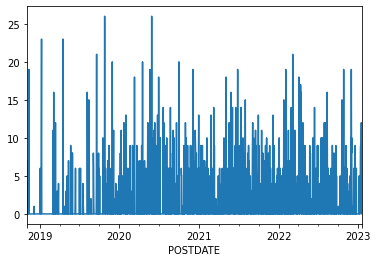

In [3]:
# clean the date strings
dPOST['POSTDATE'] = dPOST['POSTDATE'].str.replace('(', '')
dPOST['POSTDATE'] = dPOST['POSTDATE'].str.replace(')', '')

dPOST['POSTDATE'] = pd.to_datetime(dPOST['POSTDATE'])
dPOST['POSTDATE'] = dPOST['POSTDATE'].dt.date
dPOST['POSTDATE'] = pd.to_datetime(dPOST['POSTDATE'])
dPOST = dPOST.set_index('POSTDATE')
dPOST = dPOST.groupby(pd.Grouper(freq='D')).count()
dPOST['POSTID'].plot()

,POSTID,POSTLINK,POSTBODY,POSTDATE,POSTVOTECOUNTS,COMMENTID,COMMENTSCORE,COMMENTUSERNAME,COMMENTTEXT,COMMENTDATETIME,...,ANSWERTEXT,ANSWERBODY,ANSWERDATETIME,ANSWERVOTECOUNTS,ANSWERCMTID,ANSWERCMTTEXT,ANSWERCMTBODY,ANSWERCMTDATETIME,ANSWERCMTVOTECOUNTS,TYPE
POSTTITLE,,,,,,,,,,,,,,,,,,,,,
react useEffect comparing objects,23,23,23,23,23,2,0,2,2,2,...,20,20,20,20,14,14,14,14,14,23
"React useEffect Hook when only one of the effect's deps changes, but not the others",23,23,23,23,23,2,1,2,2,2,...,20,20,20,20,16,16,16,16,16,23
My React Component is rendering twice because of Strict Mode,20,20,20,20,20,1,1,1,1,1,...,18,18,18,18,14,14,14,14,14,20
React useEffect has a spread element in its dependency array,20,20,20,20,20,4,1,4,4,4,...,15,15,15,15,12,12,12,12,12,20
Make React useEffect hook not run on initial render,19,19,19,19,19,2,1,2,2,2,...,16,16,16,16,13,13,13,13,13,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
React UseEffect is not working with the firepad and firebase,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
React UseEffect hook firing every time I click on table row - Need a better way to handle this,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
React useEffect trying to set Object at the same time,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


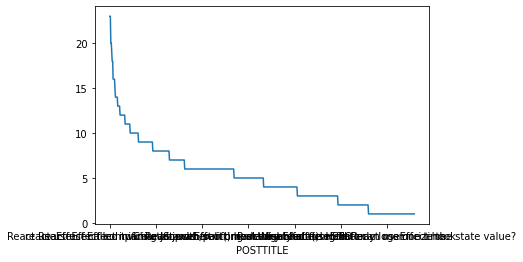

In [6]:
# calculate how many times a title is repeated
dPOST = df.copy()
dPOST = dPOST.groupby('POSTTITLE').count()
dPOST = dPOST.sort_values(by=['POSTID'], ascending=False)
dPOST['POSTID'].plot()
display(dPOST)

## Analyze each question's time span

In [7]:
dTS = df.copy()
target = "react useEffect comparing objects"

dTS = dTS[dTS['POSTTITLE'] == target]
dTS.shape

(23, 22)

In [8]:
post_date = dTS['POSTDATE'].unique()[0]
post_date

"('2019-01-08 16:34:52Z',)"

In [9]:
comment_date = dTS['COMMENTDATETIME'].unique()
comment_date = comment_date[~pd.isnull(comment_date)]

comment_date = [x.split(',') for x in comment_date]
comment_date = [x[0] for x in comment_date]
comment_date

['2020-08-29 00:10:14Z', '2021-02-06 14:23:47Z']

In [10]:
answer_date = dTS['ANSWERDATETIME'].unique()
answer_date = answer_date[~pd.isnull(answer_date)]

answer_date = [x.split(',') for x in answer_date]
answer_date = [x[0] for x in answer_date]
answer_date

['2019-01-08 17:02:16Z',
 '2020-06-12 02:50:16Z',
 '2020-08-28 08:34:29Z',
 '2020-08-11 12:15:18Z',
 '2022-06-13 16:00:58Z',
 '2020-09-19 05:38:30Z']

In [11]:
answer_cmt_date = dTS['ANSWERCMTDATETIME'].unique()
answer_cmt_date = answer_cmt_date[~pd.isnull(answer_cmt_date)]
answer_cmt_date = [x.replace('at', '') for x in answer_cmt_date]
answer_cmt_date = [x.replace(',', '') for x in answer_cmt_date]
answer_cmt_date

['Jan 8 2019  17:02',
 'Jan 8 2019  17:52',
 'Jan 12 2019  19:58',
 'May 9 2020  11:30',
 'Oct 22 2020  15:12',
 'Jun 12 2020  2:50',
 'Aug 28 2020  8:34',
 'Aug 29 2020  17:50',
 'Aug 11 2020  12:15',
 'Feb 23 2022  12:35',
 'Jun 13 2022  16:00',
 'Nov 11 2022  21:49',
 'Nov 13 2022  5:47',
 'Sep 19 2020  5:38']

/var/folders/x0/f6tjyw_s7vqbx5gcpvt0z31w0000gn/T/ipykernel_54467/4259393917.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  timedf = timedf.append(pd.DataFrame({'date': answer_date, 'type': 'answer'}), ignore_index=True)
/var/folders/x0/f6tjyw_s7vqbx5gcpvt0z31w0000gn/T/ipykernel_54467/4259393917.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  timedf = timedf.append(pd.DataFrame({'date': comment_date, 'type': 'comment'}), ignore_index=True)


<AxesSubplot:xlabel='date'>

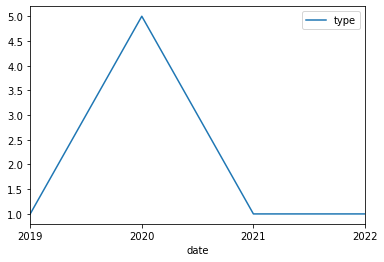

In [12]:
import plotly.express as px
import datetime
import pytz

utc=pytz.UTC

timedf = pd.DataFrame(columns=['date', 'type'])

timedf = timedf.append(pd.DataFrame({'date': answer_date, 'type': 'answer'}), ignore_index=True)
timedf = timedf.append(pd.DataFrame({'date': comment_date, 'type': 'comment'}), ignore_index=True)
# timedf = timedf.append(pd.DataFrame({'date': answer_cmt_date, 'type': 'answer_comment'}), ignore_index=True)

timedf['date'] = pd.to_datetime(timedf['date'])
timedf = timedf.set_index('date')
timedf = timedf.groupby(pd.Grouper(freq='Y')).count()
timedf.plot()
